In [90]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
from scipy.stats import chisquare
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [14]:
data=pd.read_csv(r"C:\Users\sudarson.SUDARSON\Downloads\test mach learn\Paper2\credit_card.csv").replace(np.NaN,"unknown")

In [15]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,unknown,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
col = list(data.columns)
col

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

<h1>missing value<h1>

In [17]:
for i in range(0,len(col)):
    if(data[data[col[i]]=='unknown'].shape[0]!=0):
        print(col[i],data[data[col[i]]=='unknown'].shape[0])

CREDIT_LIMIT 1
MINIMUM_PAYMENTS 313


In [18]:
data.shape

(8950, 18)

<h1>zscore<h1>

In [19]:
data=pd.DataFrame(np.random.randint(0,10,size=(data.shape)),columns=col)

In [20]:
data.apply(stats.zscore)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.864487,-1.566118,1.223868,-0.524651,-1.557307,-0.163954,-1.566369,0.863533,-1.218849,-1.553032,-0.202777,0.880762,0.166646,-0.179989,-0.183192,0.862537,0.169071,-1.238506
1,-1.220345,-1.566118,-1.566419,0.169814,0.177903,-0.512421,0.499147,0.518490,1.565226,1.572824,0.845059,0.182611,1.209882,-1.562443,-0.531739,1.562959,-1.228789,-0.180913
2,0.864487,0.875886,-1.217633,-0.524651,1.566070,-0.163954,-1.222117,-0.516640,0.521197,-0.511080,0.146502,1.578914,0.862137,-0.179989,0.165355,1.212748,1.566930,0.524148
3,-1.220345,-1.217260,-0.171275,-0.524651,-1.557307,0.532978,-0.189358,-1.206726,-1.218849,0.530872,1.543615,0.531687,-0.528845,-0.525603,-0.531739,-0.538308,-0.529859,-0.180913
4,0.864487,-0.868402,1.572654,-0.524651,-1.210265,-1.209354,-0.533611,0.173447,0.521197,0.530872,0.845059,-1.562766,0.514391,-0.525603,-0.183192,-1.238730,1.217465,0.171618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.177929,-1.566118,-1.566419,-0.177418,0.871986,-1.209354,0.499147,-0.516640,1.565226,0.183554,1.543615,1.229838,-0.528845,-0.179989,-1.228833,-1.238730,1.217465,-1.591037
8946,0.864487,0.875886,1.572654,-0.871884,-0.169139,1.578378,0.154895,0.863533,-0.174821,-1.553032,-0.202777,-1.213691,-0.876591,-0.525603,-0.531739,0.862537,1.217465,-0.885975
8947,0.169543,0.527028,0.177511,1.558745,-1.557307,-0.860887,1.531906,-0.516640,-1.566859,-1.553032,-1.599890,-1.562766,1.209882,1.548077,-1.577380,-1.238730,0.169071,0.876679
8948,0.169543,1.573602,0.177511,-1.566349,-0.516181,-0.512421,-0.189358,-1.551769,-1.218849,0.183554,0.146502,0.880762,-1.572082,0.856851,-0.183192,-0.888519,-0.879324,1.581741


<h1>correlation<h1>

<AxesSubplot:>

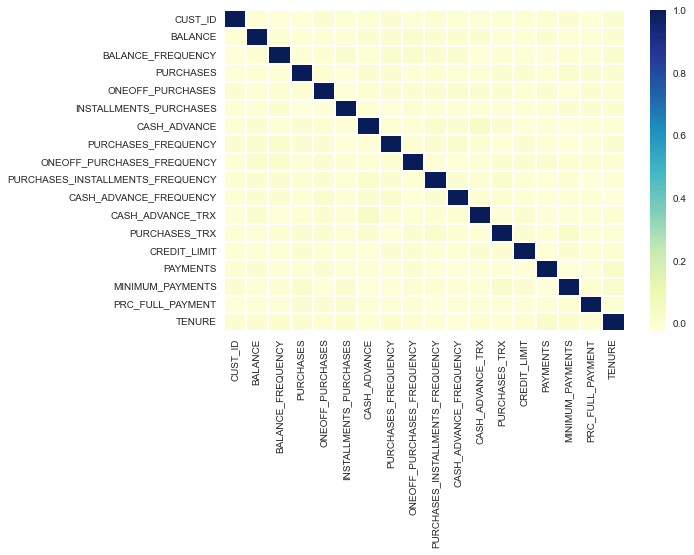

In [98]:
corrmat = data.corr()

sns.heatmap(corrmat,  cmap ="YlGnBu", linewidths = 0.1)

<AxesSubplot:>

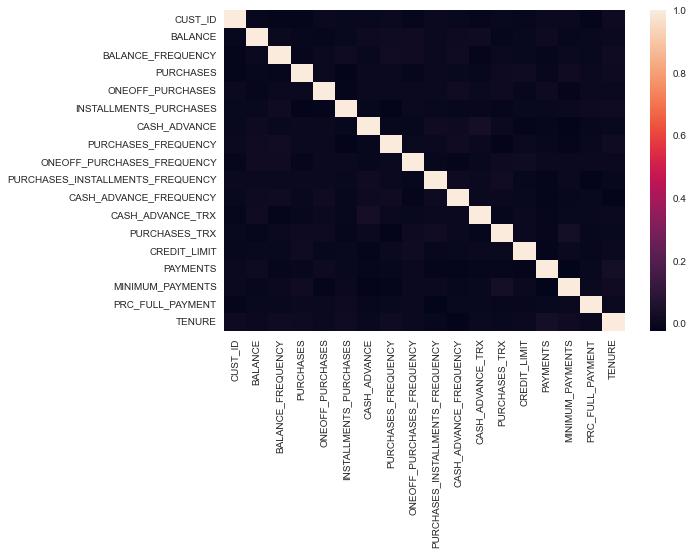

In [99]:
sns.heatmap(corrmat )

<h1>The primary analysis of several categorical features reveal</h1>

In [21]:
for i in range(0,len(col)):
    if(col[i]=="CUST_ID"):
        print(chisquare(data[col[i]]))

Power_divergenceResult(statistic=16428.87752271996, pvalue=0.0)


In [22]:
col = list(data.columns)
col

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

<h1>pca<h1>

In [24]:
pca = PCA()

In [25]:
pca.fit(data)

PCA()

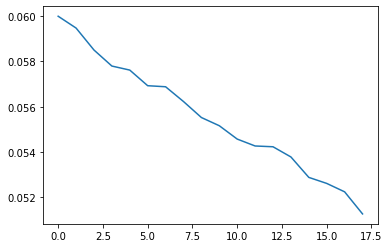

In [28]:
plt.plot(pca.explained_variance_ratio_)

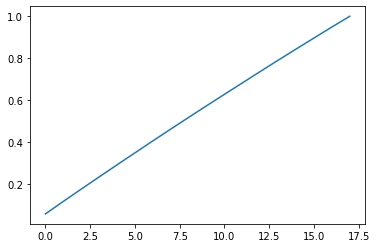

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

<h1>pca 95 %<h1>

In [31]:
pca=PCA(n_components=.95).fit(data)

In [32]:
cp=pca.transform(data)

In [33]:
cp=pd.DataFrame(cp)

In [34]:
cp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-3.826992,0.416108,1.225313,0.978365,-0.284793,-6.561662,-1.135631,-0.173083,-0.473455,3.326357,-1.773467,-3.477902,-5.293295,1.612167,-0.596511,-0.203772,3.915629,-3.469269
1,3.338962,5.787974,0.441102,2.146846,1.820649,3.185840,1.166048,0.429214,1.138619,1.708198,-0.611442,1.675074,-4.353076,-1.462200,5.611233,-6.026549,-3.325357,1.467891
2,-2.184196,0.269195,-1.489713,1.911627,-2.233761,2.741127,1.526116,-2.465354,-1.212199,6.844824,6.339595,1.802219,1.291339,0.984772,-0.363626,-0.714411,1.299021,-0.180188
3,1.931839,1.627457,-3.357490,-2.083417,2.238001,-5.531173,1.429949,0.233953,1.408718,-3.159829,1.337154,-2.503153,-3.318704,0.078451,-0.237749,-3.091826,0.421406,3.137388
4,-0.918910,-1.156624,2.976704,2.916302,3.113045,-1.594853,2.034173,0.870971,2.466410,0.242315,-5.443173,-0.555216,1.153240,3.250829,-4.109904,-2.459547,2.423524,2.920535


In [68]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples,silhouette_score

In [50]:
style.use("fivethirtyeight")

<h1>q4 elbow curve<h1>

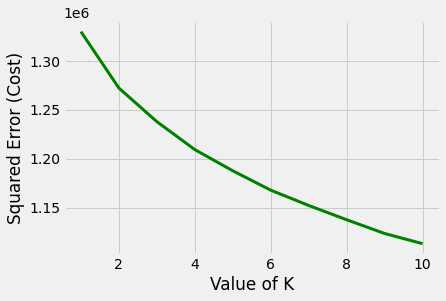

In [52]:

cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(data)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

<h1>silhouttescore<h1>

In [80]:
km = KMeans(n_clusters=3, random_state=10)
km.fit_predict(data)

array([2, 1, 2, ..., 1, 1, 1])

In [81]:
score = silhouette_score(data, km.labels_,metric='euclidean')

In [82]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.036


In [85]:
Cluster1= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
Cluster1.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)